In [1]:
import pandas as pd
import numpy as np

# Load the new dataset
df = pd.read_csv('student-por.csv')

In [2]:
# Get a list of all columns that are 'object' type
object_cols = df.select_dtypes(include='object').columns

print(f"Found {len(object_cols)} text-based (object) columns:\n")
print(object_cols)
print("\n" + "="*50 + "\n")
print("Now, let's inspect their unique values:")

# Loop through them and print their unique values to see what we're dealing with
for col in object_cols:
    print(f"--- Column: {col} ---")
    print(f"Unique values: {df[col].unique()}")
    print("\n")

Found 17 text-based (object) columns:

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


Now, let's inspect their unique values:
--- Column: school ---
Unique values: ['GP' 'MS']


--- Column: sex ---
Unique values: ['F' 'M']


--- Column: address ---
Unique values: ['U' 'R']


--- Column: famsize ---
Unique values: ['GT3' 'LE3']


--- Column: Pstatus ---
Unique values: ['A' 'T']


--- Column: Mjob ---
Unique values: ['at_home' 'health' 'other' 'services' 'teacher']


--- Column: Fjob ---
Unique values: ['teacher' 'other' 'services' 'health' 'at_home']


--- Column: reason ---
Unique values: ['course' 'other' 'home' 'reputation']


--- Column: guardian ---
Unique values: ['mother' 'father' 'other']


--- Column: schoolsup ---
Unique values: ['yes' 'no']


--- Column: famsup ---
Unique values: ['no' 'yes']


--- Col

In [1]:
import pandas as pd

# --- Step 2: Define Features and Encode Data ---

# Load the dataset
df = pd.read_csv('student-por.csv')

# 1. Define our target variable (y)
# We want to predict the final grade, 'G3'
y = df['G3']

# 2. Define our features (X)
# We drop G3 (the answer)
# We also drop G1 and G2 (because they are leaky)
X = df.drop(['G3', 'G1', 'G2'], axis=1)

print("--- BEFORE ENCODING ---")
X.info()

# 3. This is the conversion (encoding) step!
# pd.get_dummies() automatically finds all text columns
# and converts them to numerical (0 or 1) columns.
X = pd.get_dummies(X)

print("\n--- AFTER ENCODING ---")
X.info()

print("\nData is now 100% numerical and ready for a model!")

--- BEFORE ENCODING ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null  

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# --- Step 3: Train and Evaluate the Model ---
# (This assumes your 'X' and 'y' variables are ready from the last step)

print("Starting model training...")

# 1. Split your new, clean data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training on {X_train.shape[0]} students, testing on {X_test.shape[0]} students.")

# 2. Create the model
# We use a Regressor because G3 is a number (0-20), not a category.
model = RandomForestRegressor(random_state=42)

# 3. Train the model
# The .fit() command is the "learning" step.
print("Training the model... (this may take a moment)")
model.fit(X_train, y_train)
print("Model training complete!")

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
# For regression, we can't use "accuracy".
# We use Mean Absolute Error (MAE) - the average error in our prediction.
mae = mean_absolute_error(y_test, y_pred)
avg_grade = y_train.mean()

print("\n--- Model Evaluation ---")
print(f"Average Final Grade (G3) in the dataset: {avg_grade:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"\nThis means your model's predictions are, on average, off by {mae:.2f} grade points.")

Starting model training...
Training on 519 students, testing on 130 students.
Training the model... (this may take a moment)
Model training complete!

--- Model Evaluation ---
Average Final Grade (G3) in the dataset: 11.79
Mean Absolute Error (MAE): 2.04

This means your model's predictions are, on average, off by 2.04 grade points.


Top 10 Most Important Features:
     feature  importance
5   failures    0.206499
12  absences    0.069192
2       Fedu    0.048847
9       Dalc    0.040835
10      Walc    0.038697
7   freetime    0.034355
0        age    0.033105
8      goout    0.032456
11    health    0.032153
1       Medu    0.030054


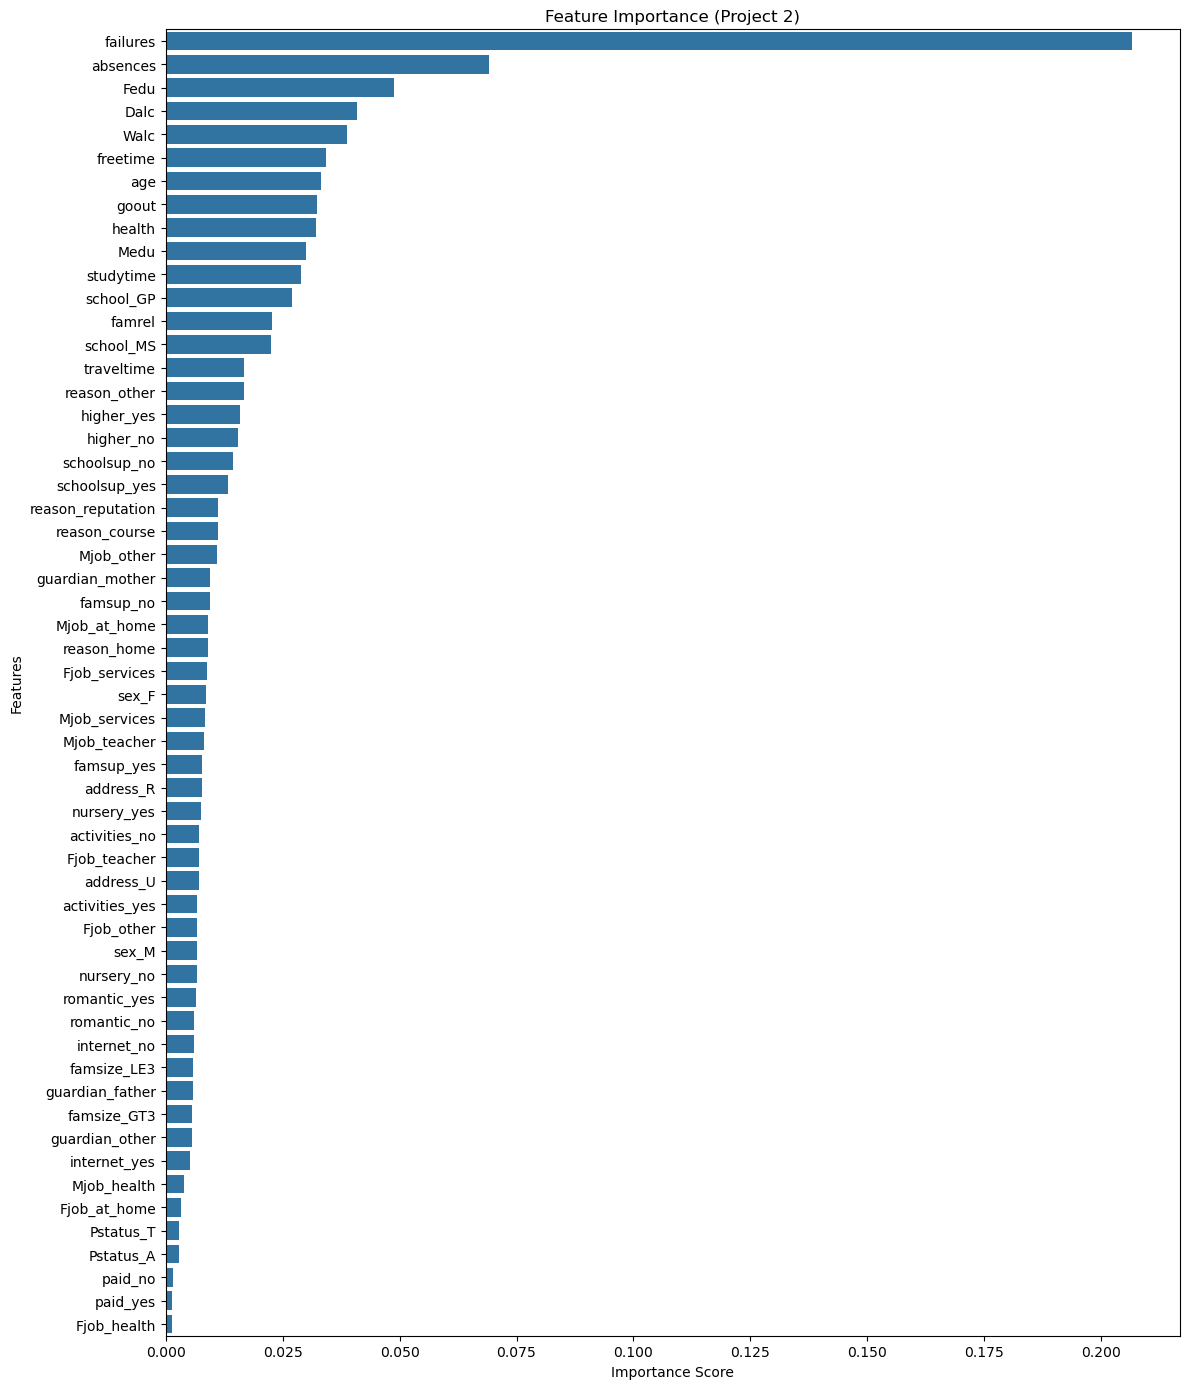

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 4: Get and Plot Feature Importances ---
# (This assumes your 'model' and 'X' variables are ready from the last steps)

# Get feature importances from the model
importances = model.feature_importances_

# Create a DataFrame to view them easily, sorted by importance
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importances.head(10))

# Plot all feature importances for a visual view
# We have 56 features, so we need a larger plot
plt.figure(figsize=(12, 14))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance (Project 2)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance_project2.png')

In [4]:
# (This assumes 'X' is your encoded DataFrame from Step 2)

# Get the full list of 56 feature names in the correct order
feature_names = X.columns.tolist()

print("Your model needs 56 features in this exact order:")
print(feature_names)

Your model needs 56 features in this exact order:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']


In [5]:
# --- Make Your Own Prediction ---
# (This assumes 'model' is your trained model from Step 3)

# 1. Create your custom student's features (56 total)
#    You must match the order from the list you just printed!

my_student = [
    # --- 13 Numerical Features ---
    17,  # age
    4,   # Medu (Mother's education)
    4,   # Fedu (Father's education)
    1,   # traveltime
    3,   # studytime (e.g., 3 = 5-10 hours/week)
    0,   # failures (Number of past failures)
    4,   # famrel (Family relationship, 1-5)
    3,   # freetime (Free time after school)
    4,   # goout (Going out with friends)
    1,   # Dalc (Workday alcohol consumption, 1-5)
    1,   # Walc (Weekend alcohol consumption, 1-5)
    5,   # health (Current health status, 1-5)
    2,   # absences (Number of school absences)
    
    # --- 43 One-Hot Encoded Features ---
    # (Set 1 for the matching category, 0 for all others in that group)
    
    # school: school_GP=1, school_MS=0
    1, 0,
    # sex: sex_F=1, sex_M=0
    1, 0,
    # address: address_R=0, address_U=1 (Urban)
    0, 1,
    # famsize: famsize_GT3=1, famsize_LE3=0
    1, 0,
    # Pstatus: Pstatus_A=0, Pstatus_T=1 (Living together)
    0, 1,
    # Mjob: 'at_home','health','other','services','teacher'
    0, 0, 0, 0, 1,  # (Mjob_teacher = 1)
    # Fjob: 'at_home','health','other','services','teacher'
    0, 0, 0, 1, 0,  # (Fjob_services = 1)
    # reason: 'course','home','other','reputation'
    1, 0, 0, 0,  # (reason_course = 1)
    # guardian: 'father','mother','other'
    0, 1, 0,  # (guardian_mother = 1)
    # schoolsup: schoolsup_no=1, schoolsup_yes=0
    1, 0,
    # famsup: famsup_no=0, famsup_yes=1
    0, 1,
    # paid: paid_no=1, paid_yes=0
    1, 0,
    # activities: activities_no=0, activities_yes=1
    0, 1,
    # nursery: nursery_no=0, nursery_yes=1
    0, 1,
    # higher: higher_no=0, higher_yes=1
    0, 1,
    # internet: internet_no=0, internet_yes=1
    0, 1,
    # romantic: romantic_no=1, romantic_yes=0
    1, 0
]

# 2. Put the student in a list (model expects a 2D array)
student_to_predict = [my_student]

# 3. Get the prediction!
predicted_grade = model.predict(student_to_predict)

print("\n--- Custom Prediction ---")
print(f"Number of features provided: {len(my_student)}")
print(f"Model predicts a final grade (G3) of: {predicted_grade[0]:.2f}")


--- Custom Prediction ---
Number of features provided: 56
Model predicts a final grade (G3) of: 14.86


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
